In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
from datetime import datetime
from packaging import version

import os
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

In [30]:
import shutil
shutil.rmtree('C:/Users/raemu/Documents/TF Class Code/TensorFlow In Practice/Course 3 - NLP/logs')

In [6]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [7]:
tokenizer = info.features['text'].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
#tf.compat.v1.data.get_output_shapes(train_dataset)
# train_dataset.output_shapes
# test_dataset.output_shapes
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# NUM_EPOCHS = 10
NUM_EPOCHS = 3
with tf.device('/GPU:0'):
    history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, callbacks=[tboard_callback])

Epoch 1/3
391/391 [==============================] - 122s 313ms/step - loss: 0.1156 - accuracy: 0.9621 - val_loss: 0.6555 - val_accuracy: 0.7881
Epoch 2/3
249/391 [==================>...........] - ETA: 30s - loss: 0.1415 - accuracy: 0.9527

In [32]:
os.environ['TENSORBOARD_BINARY'] = 'C:/ProgramData/Anaconda3/envs/TF-2.5/Scripts/tensorboard'
# Load the TensorBoard notebook extension.
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [33]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=logs --host localhost

Reusing TensorBoard on port 6006 (pid 19332), started 2:01:41 ago. (Use '!kill 19332' to kill it.)

In [24]:
# Clear any logs from previous runs
os.remove(logs/)

SyntaxError: invalid syntax (Temp/ipykernel_13868/1836772142.py, line 2)

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

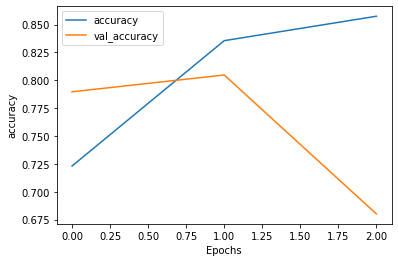

In [16]:
plot_graphs(history, 'accuracy')

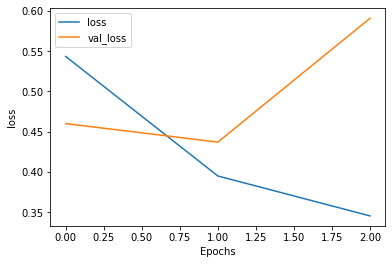

In [17]:
plot_graphs(history, 'loss')